# Data missingness arter region/income group averages

Here, see see the WSI indicators where entire regions are missing values.

In [15]:
import pandas as pd
from wsi.config import INDICATORS
from wsi.utils import processed_data_path, raw_data_path

index_baseline = pd.read_csv(processed_data_path("womens_safety_index_baseline.csv"))
indicator_columns = [col for col in index_baseline.columns if col in INDICATORS]

missing_records = []
for col in indicator_columns:
    missing_rows = index_baseline[index_baseline[col].isnull()][['ISO_code', 'Economy', 'Region']].copy()
    if not missing_rows.empty:
        missing_rows['Indicator'] = col
        missing_records.append(missing_rows)

# Combine and deduplicate
all_missing = pd.concat(missing_records, ignore_index=True)
unique_missing = all_missing.drop_duplicates().reset_index(drop=True)
display(unique_missing)  

,ISO_code,Economy,Region,Indicator
0,PRK,Democratic People's Republic of Korea (North K...,NaN,Education
1,TWN,Taiwan,NaN,Education
2,NCL,New Caledonia,NaN,Education
3,COK,Cook Islands,NaN,Education
4,NIU,Niue,NaN,Education
...,...,...,...,...
377,SXM,Sint Maarten (Dutch part),NaN,Financial Inclusion
378,KNA,St. Kitts and Nevis,NaN,Financial Inclusion
379,MAF,St. Martin (French part),NaN,Financial Inclusion
380,TCA,Turks and Caicos Islands,NaN,Financial Inclusion


In [16]:
index_baseline

,ISO_code,Year,Education,Employment,Parliamentary Representation,Poverty,Legal Protection Index,Son Bias,Maternal Mortality,Attitudes Towards Violence,...,Access Water Sanitation (score),Access Electricity (score),Cell Phone Use (score),Financial Inclusion (score),Equity,Protection,Resources,WSI (Baseline),included_index,Economy
0,AFG,1995,0.217986,48.240352,25.925926,55.268182,0.197917,105.8,1346.1441,7.485015,...,0.163862,0.03629,0.0,0.018369,0.248064,0.565406,0.05463,0.197145,True,Afghanistan
1,AFG,1996,0.217986,48.240352,25.925926,55.268182,0.197917,106.0,1346.1441,7.485015,...,0.163862,0.03629,0.0,0.018369,0.248064,0.562549,0.05463,0.196813,True,Afghanistan
2,AFG,1997,0.217986,48.240352,25.925926,55.268182,0.197917,106.2,1346.1441,7.485015,...,0.163862,0.03629,0.0,0.018369,0.248064,0.559692,0.05463,0.196479,True,Afghanistan
3,AFG,1998,0.217986,48.240352,25.925926,55.268182,0.197917,106.4,1346.1441,7.485015,...,0.163862,0.03629,0.0,0.018369,0.248064,0.556835,0.05463,0.196144,True,Afghanistan
4,AFG,1999,0.217986,48.240352,25.925926,55.268182,0.197917,106.5,1346.1441,7.485015,...,0.163862,0.03629,0.0,0.018369,0.248064,0.555406,0.05463,0.195976,True,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,VIR,2020,NaN,NaN,NaN,NaN,NaN,103.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Virgin Islands
6656,VIR,2021,NaN,NaN,NaN,NaN,NaN,103.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Virgin Islands
6657,VIR,2022,NaN,NaN,NaN,NaN,NaN,103.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Virgin Islands
6658,VIR,2023,NaN,NaN,NaN,NaN,NaN,103.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Virgin Islands


# GDP
This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. 

GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

In [2]:
from wsi.mapping.iso_region import CODE_SUBREGION

gdp = pd.read_csv(raw_data_path("mapping", "API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_85176.csv"), skiprows=4)
years_to_ffill = [str(year) for year in range(2018, 2024)]
gdp[years_to_ffill] = gdp[years_to_ffill].ffill(axis=1)
gdp = gdp[['Country Code','2023']].dropna()

gdp['Region'] = gdp['Country Code'].map(CODE_SUBREGION)
gdp = gdp.dropna()

# by subregion
gdp_subregion = gdp.groupby('Region').agg(
    GDP=('2023', 'sum'),
    Country_Count=('Country Code', 'count')
).reset_index()
gdp_subregion = gdp_subregion.sort_values(by='GDP', ascending=False).reset_index(drop=True)
gdp_subregion

,Region,GDP,Country_Count
0,Northern Europe,848467.750333,12
1,Caribbean,728577.445304,20
2,Southern Europe,710364.573999,16
3,Western Europe,574393.300642,7
4,Middle East,536991.071530,12
5,Eastern Europe,381829.542091,10
6,Southeast Asia,355555.376144,11
7,East Asia,332612.076328,6
8,South America,276549.580560,11
9,Central America,148387.043852,8


In [3]:
gdp

,Country Code,2023,Region
0,ABW,44967.344513,Caribbean
2,AFG,2211.280635,Southern Asia
4,AGO,8040.702450,Central Africa
5,ALB,21263.195659,Southern Europe
6,AND,71730.668682,Southern Europe
...,...,...,...
260,WSM,6996.841921,Polynesia
261,XKX,15141.245733,Southern Europe
263,ZAF,15194.199176,Southern Africa
264,ZMB,4076.995087,Eastern Africa


In [4]:
region_avgs = pd.read_csv(processed_data_path("region_avgs.csv"))
region_avgs

,Region,Year,Education,Employment,Parliamentary Representation,Poverty,Legal Protection Index,Son Bias,Maternal Mortality,Attitudes Towards Violence,Child Marriage,Access Water Sanitation,Access Electricity,Cell Phone Use,Financial Inclusion
0,Australia and New Zealand,1995,0.984428,60.879285,24.851190,0.700000,0.843750,105.800000,8.892755,2.607445,NaN,99.949432,100.0,11.194223,0.990203
1,Australia and New Zealand,1996,0.984428,61.855174,24.851190,0.700000,0.843750,105.750000,8.892755,2.607445,NaN,99.949432,100.0,17.563039,0.990203
2,Australia and New Zealand,1997,0.984428,61.718076,24.851190,0.700000,0.843750,105.500000,8.892755,2.607445,NaN,99.949432,100.0,19.930937,0.990203
3,Australia and New Zealand,1998,0.984428,61.730504,24.851190,0.700000,0.859375,105.450000,8.892755,2.607445,NaN,99.949432,100.0,23.586580,0.990203
4,Australia and New Zealand,1999,0.984428,62.657319,27.529762,0.700000,0.859375,105.200000,8.892755,2.607445,NaN,99.949432,100.0,34.989305,0.990203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Western Europe,2020,0.968727,73.725684,36.225345,0.128571,0.959821,105.057143,5.785394,1.529399,0.1,99.277348,100.0,120.705638,0.989468
716,Western Europe,2021,0.968727,74.252055,37.006354,0.114286,0.964286,105.114286,5.785394,1.513571,0.1,99.276397,100.0,121.843892,0.993316
717,Western Europe,2022,0.968727,75.405565,38.431322,0.114286,0.968750,105.185714,5.785394,1.497744,0.1,99.275505,100.0,120.582778,0.993316
718,Western Europe,2023,0.968727,75.772879,38.360170,0.114286,0.968750,105.214286,5.785394,1.497744,0.1,99.275505,100.0,120.582778,0.993316


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_indicator_by_region(region_avgs, indicator):
    # Get unique regions
    regions = region_avgs["Region"].unique()
    n_regions = len(regions)

    # Grid size (auto-fit square-ish layout)
    n_cols = 6  # You can adjust this for layout preference
    n_rows = math.ceil(n_regions / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, region in enumerate(regions):
        ax = axes[i]
        region_data = region_avgs[region_avgs["Region"] == region]
        sns.lineplot(data=region_data, x="Year", y=indicator, marker="o", ax=ax)
        ax.set_title(region)
        ax.set_xlabel("Year")
        ax.set_ylabel(indicator)
        ax.set_ylim(0, 50)
        ax.grid(True)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Global layout
    fig.suptitle(f"{indicator} Over Time by Sub-Region", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for suptitle
    plt.show()


# Attitudes Towards Violence

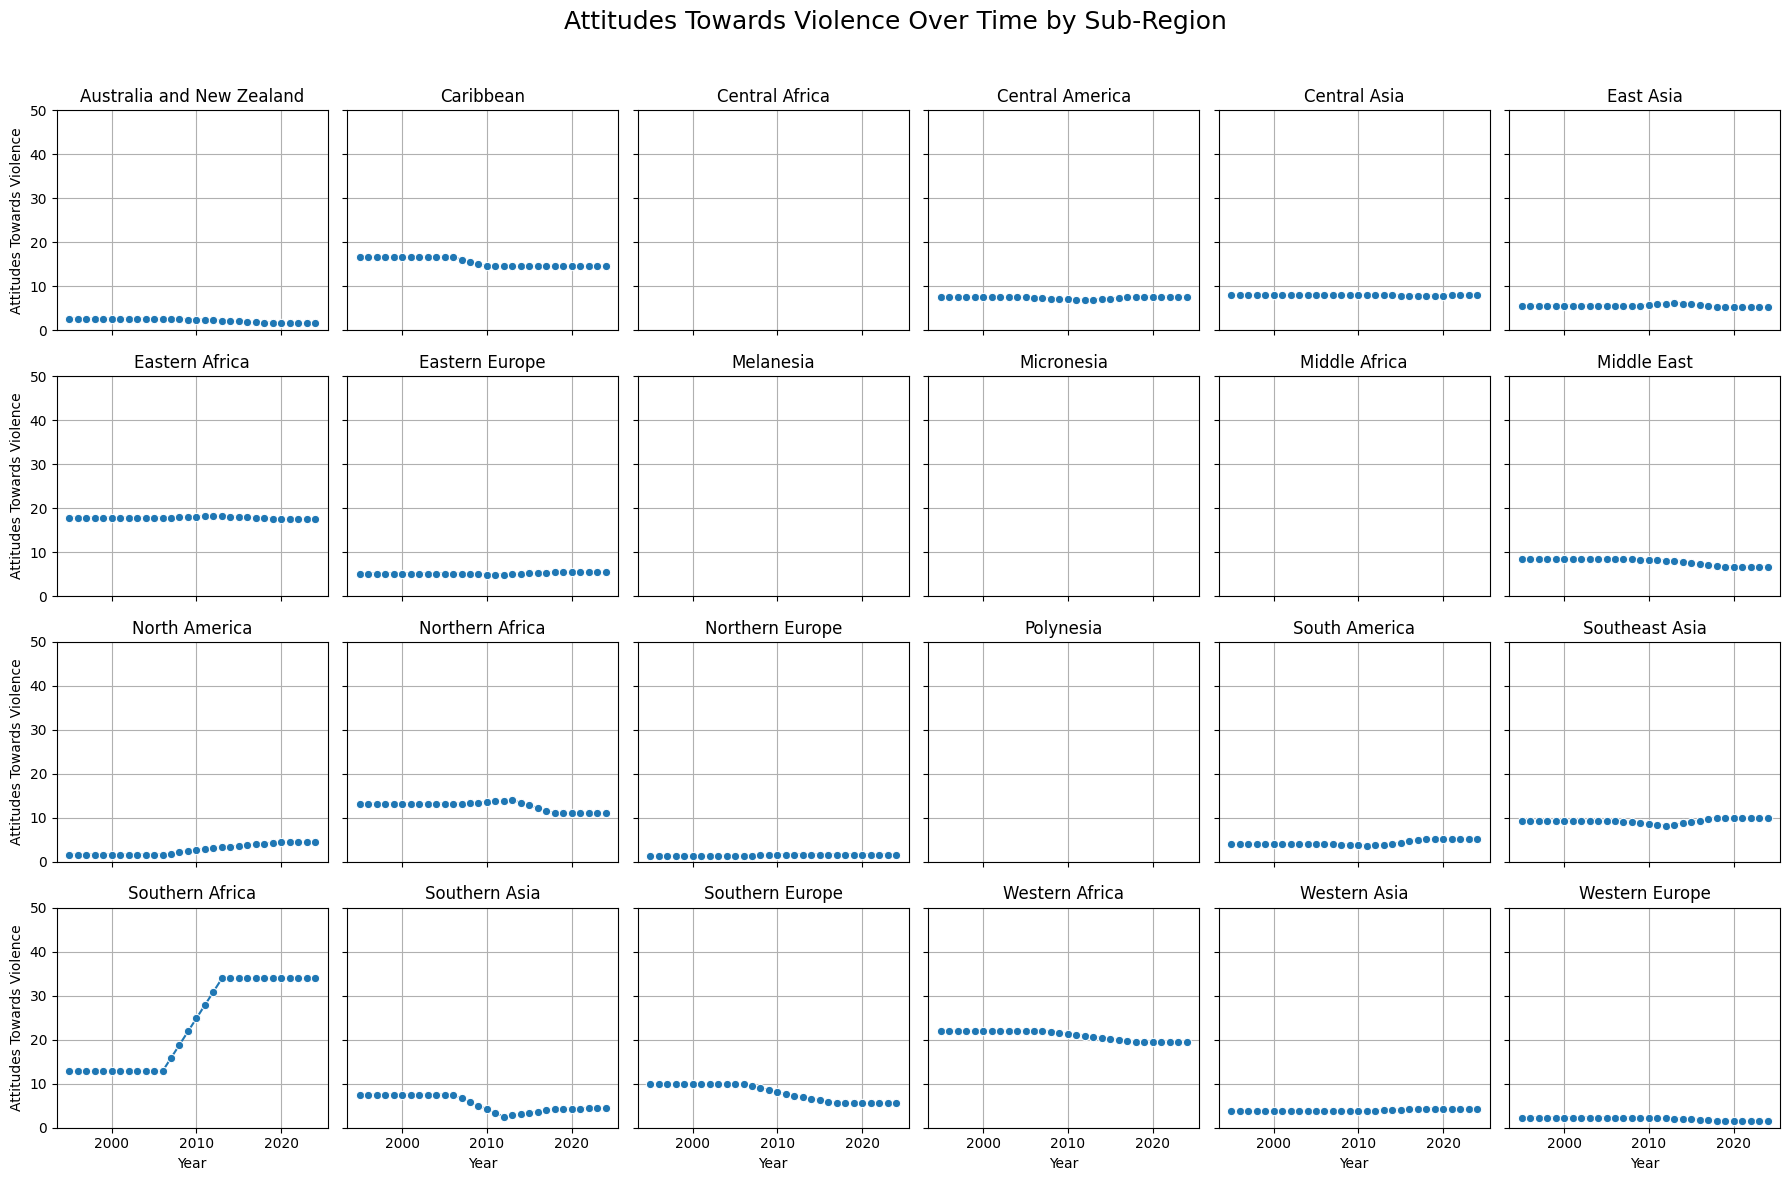

In [6]:
# Central Africa, Middle Africa, *esias
plot_indicator_by_region(region_avgs, "Attitudes Towards Violence")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_indicator_by_country_with_source(df, indicator):
    source_col = f"{indicator} (source)"
    
    countries = df['Economy'].unique()
    n_countries = len(countries)

    # Layout configuration
    n_cols = 6
    n_rows = math.ceil(n_countries / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, country in enumerate(countries):
        ax = axes[i]
        country_data = df[df['Economy'] == country]

        # Plot each source group separately with same line
        for source, group in country_data.groupby(source_col):
            sns.lineplot(
                data=group,
                x='Year',
                y=indicator,
                marker='o',
                ax=ax,
                label=source
            )

        ax.set_title(country)
        ax.set_ylim(0, 50)
        ax.set_xlabel("Year")
        ax.set_ylabel(indicator)
        ax.grid(True)
        ax.legend(fontsize="xx-small", loc="best")

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"{indicator} by Country", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
# plot_indicator_by_country_with_source(df, 'Attitudes Towards Violence')


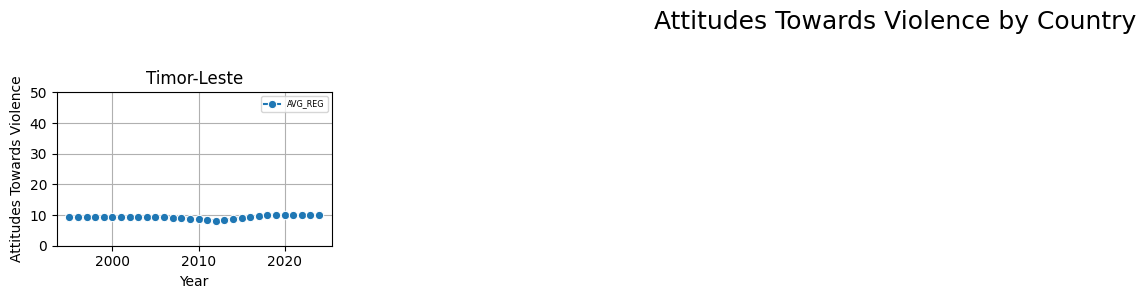

In [14]:
# for all countries in southern africa, plot their "Attitudes Towards Violence"
df = index_baseline[index_baseline['ISO_code'].isin(['TLS'])]
plot_indicator_by_country_with_source(df, 'Attitudes Towards Violence')

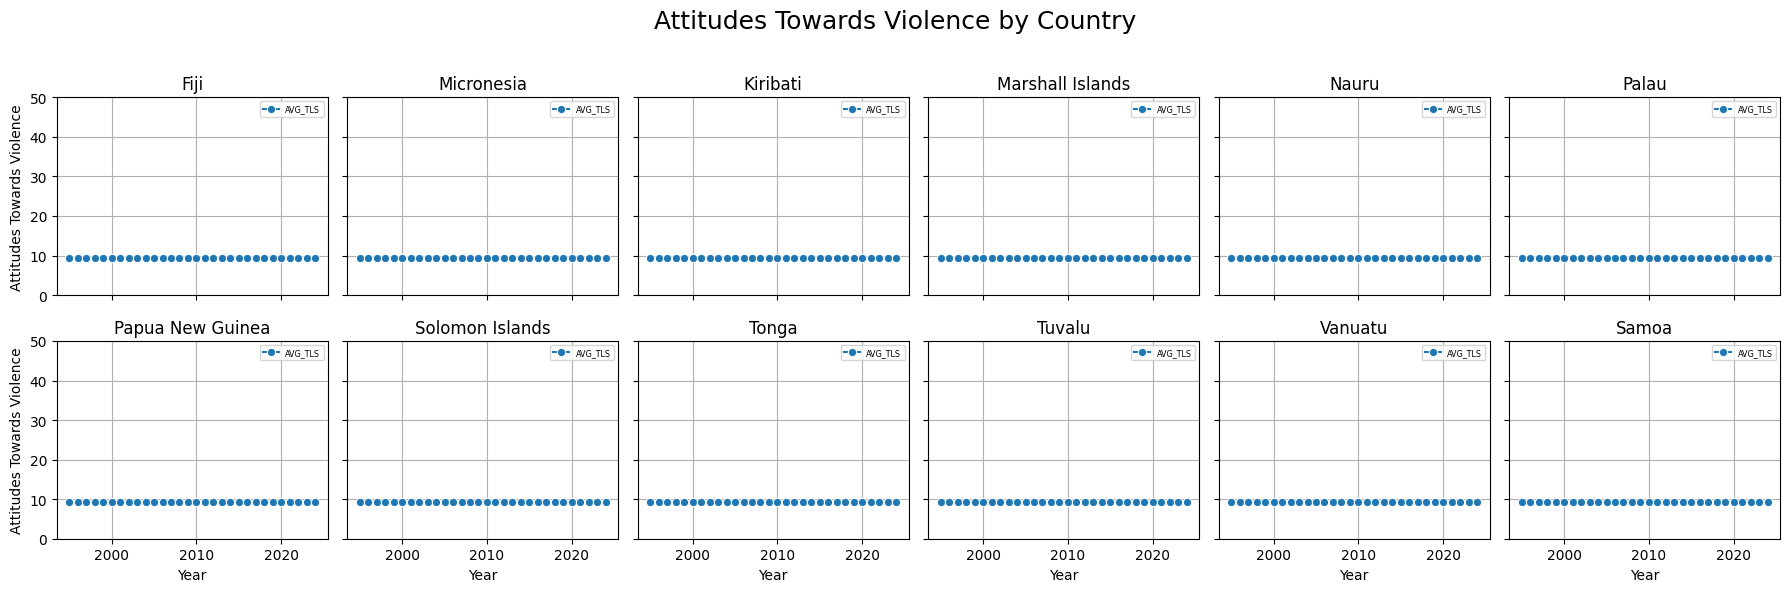

In [13]:
# for all countries in southern africa, plot their "Attitudes Towards Violence"
df = index_baseline[index_baseline['Region'].isin(['Melanesia', 'Micronesia', 'Polynesia'])]
plot_indicator_by_country_with_source(df, 'Attitudes Towards Violence')

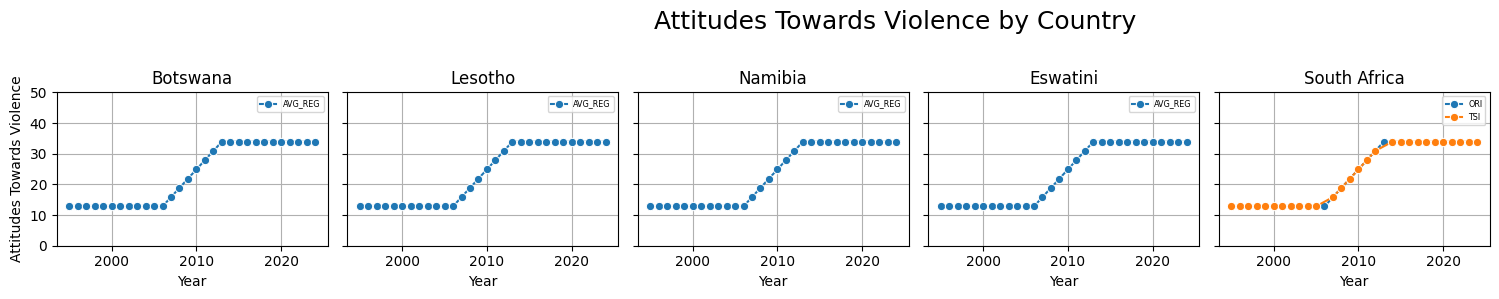

In [10]:
# for all countries in southern africa, plot their "Attitudes Towards Violence"
df = index_baseline[index_baseline['Region'] == 'Southern Africa']
plot_indicator_by_country_with_source(df, 'Attitudes Towards Violence')

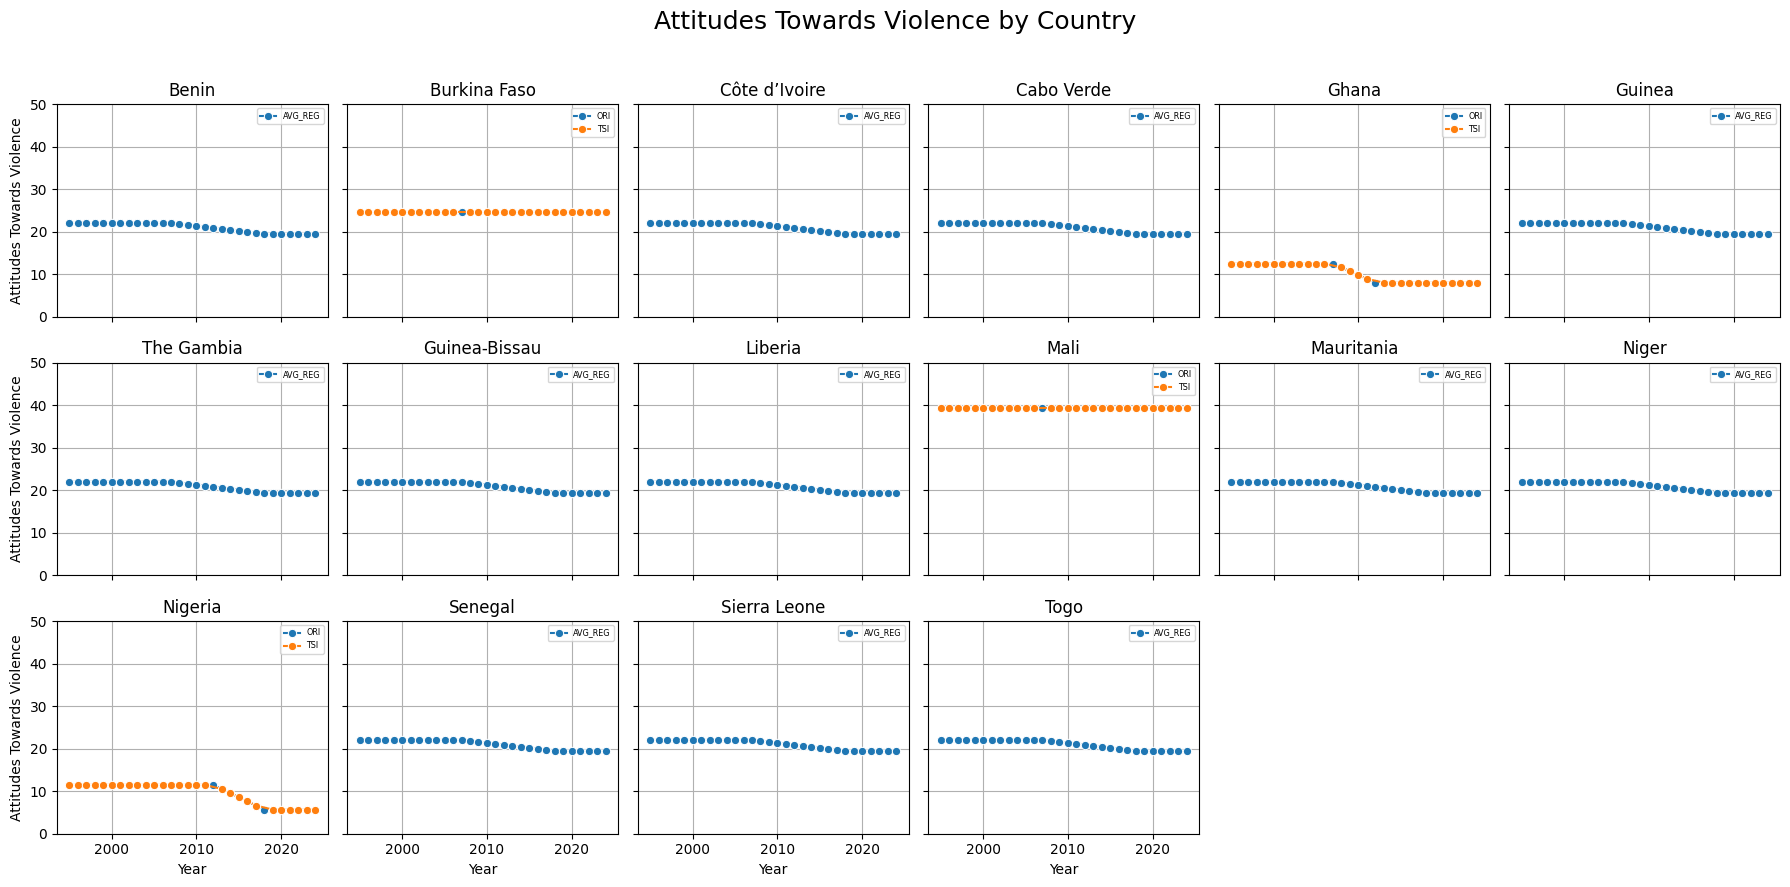

In [11]:
df = index_baseline[index_baseline['Region'] == 'Western Africa']
plot_indicator_by_country_with_source(df, 'Attitudes Towards Violence')

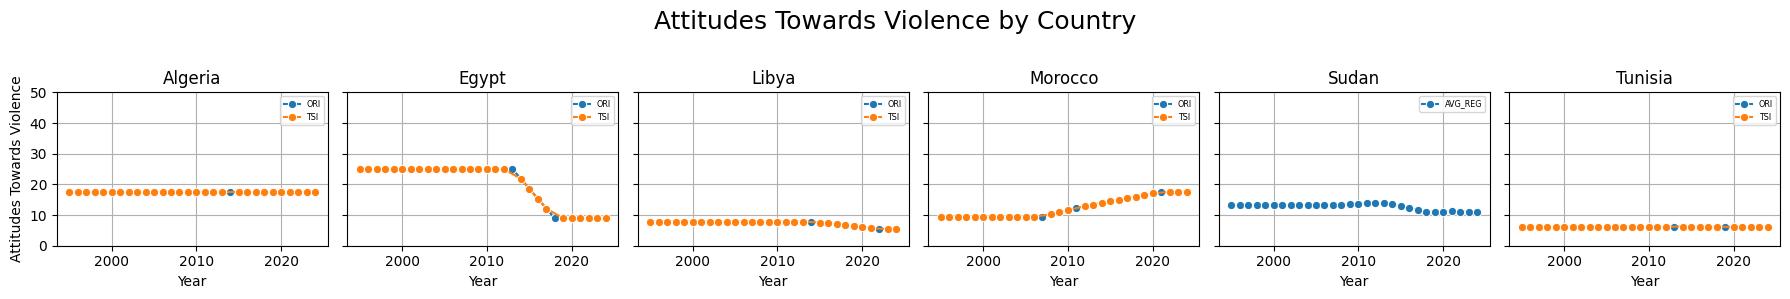

In [12]:
df = index_baseline[index_baseline['Region'] == 'Northern Africa']
plot_indicator_by_country_with_source(df, 'Attitudes Towards Violence')

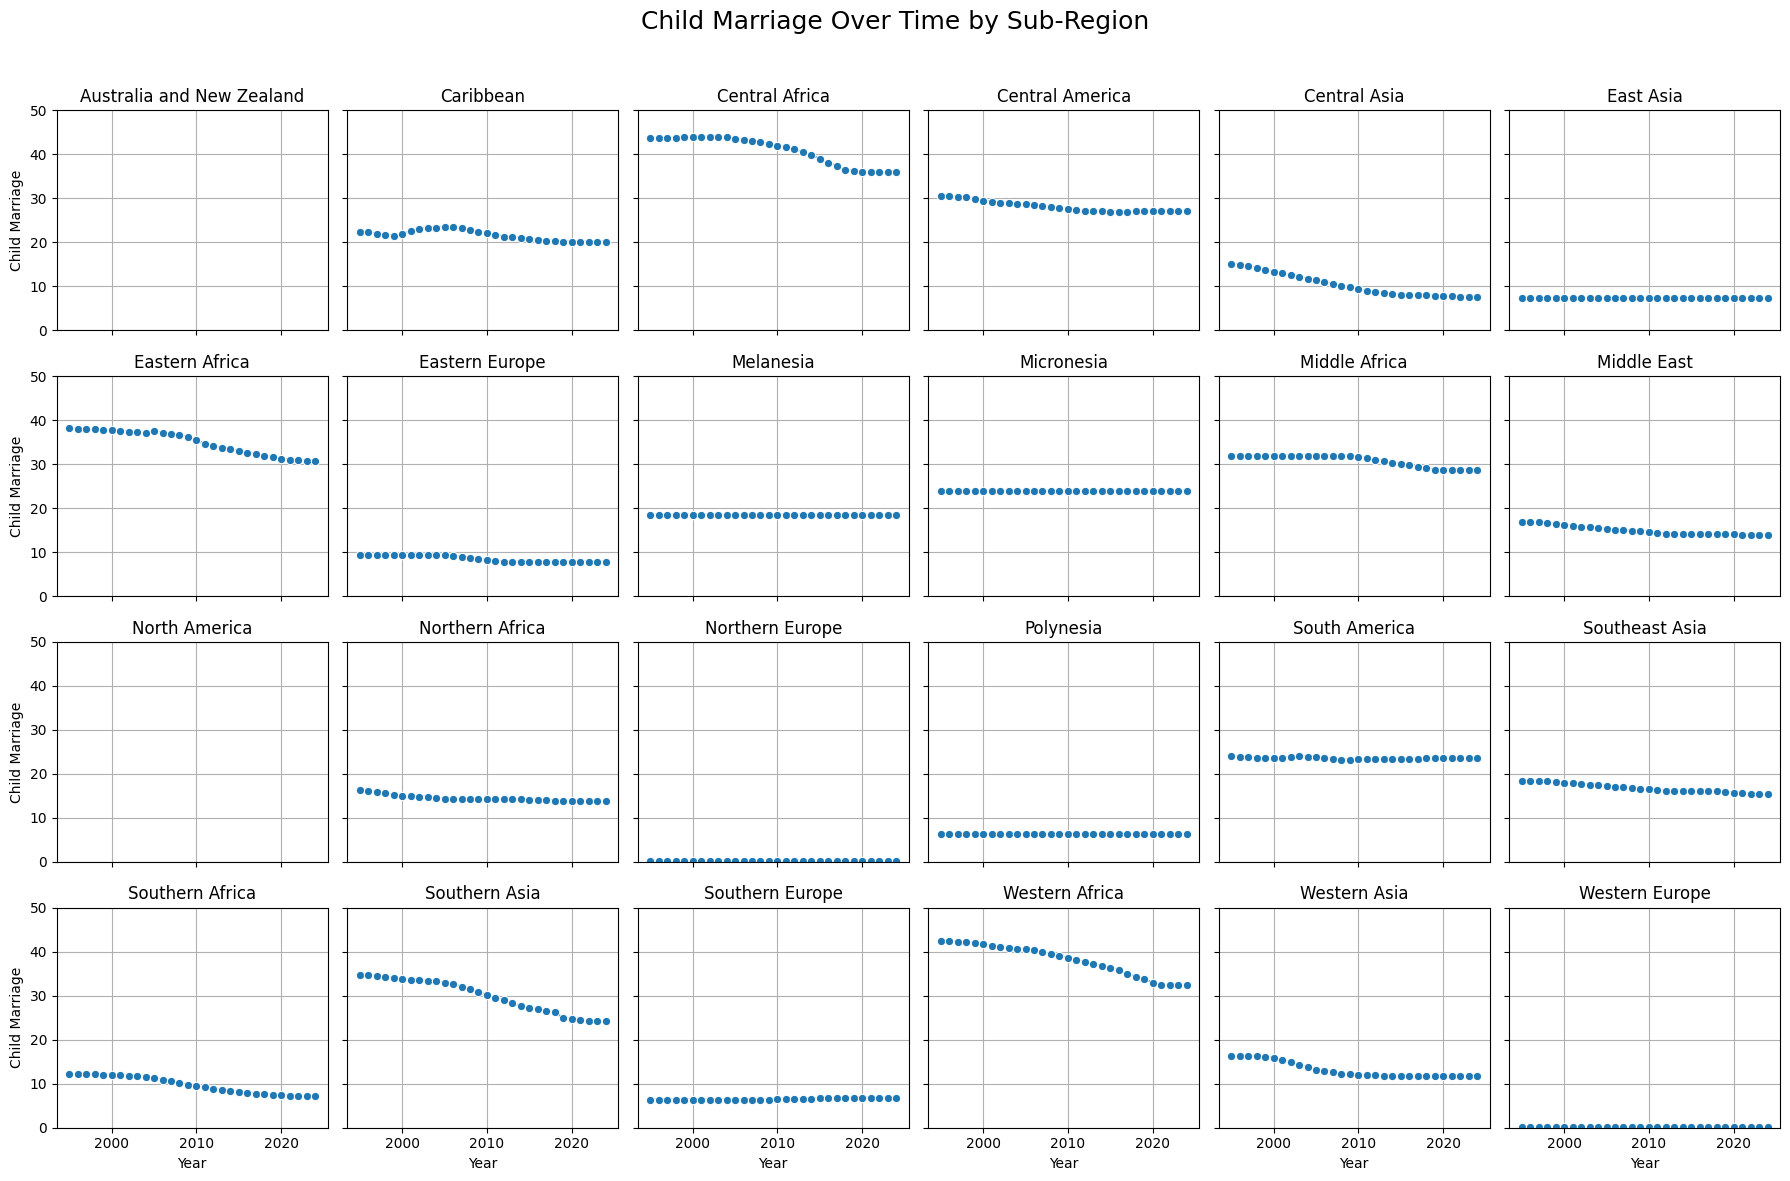

In [51]:
plot_indicator_by_region(region_avgs, "Child Marriage")

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_region_averages(region_avgs):
    # Ensure required columns exist
    if "Region" not in region_avgs.columns or "Year" not in region_avgs.columns:
        raise ValueError("DataFrame must contain 'Region' and 'Year' columns")

    # Get list of indicator columns (exclude Region and Year)
    indicators = [col for col in region_avgs.columns if col not in ["Region", "Year"]]

    for indicator in indicators:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=region_avgs, x="Year", y=indicator, hue="Region", marker="o")

        plt.title(f"{indicator} over Time by Region", fontsize=16)
        plt.xlabel("Year")
        plt.ylabel(indicator)
        plt.ylim(bottom=0)
        plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


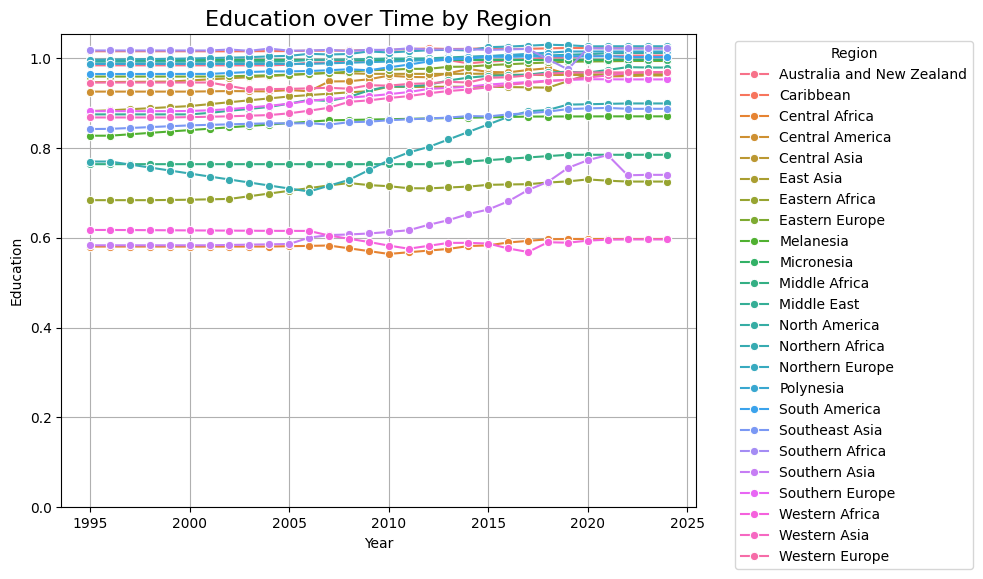

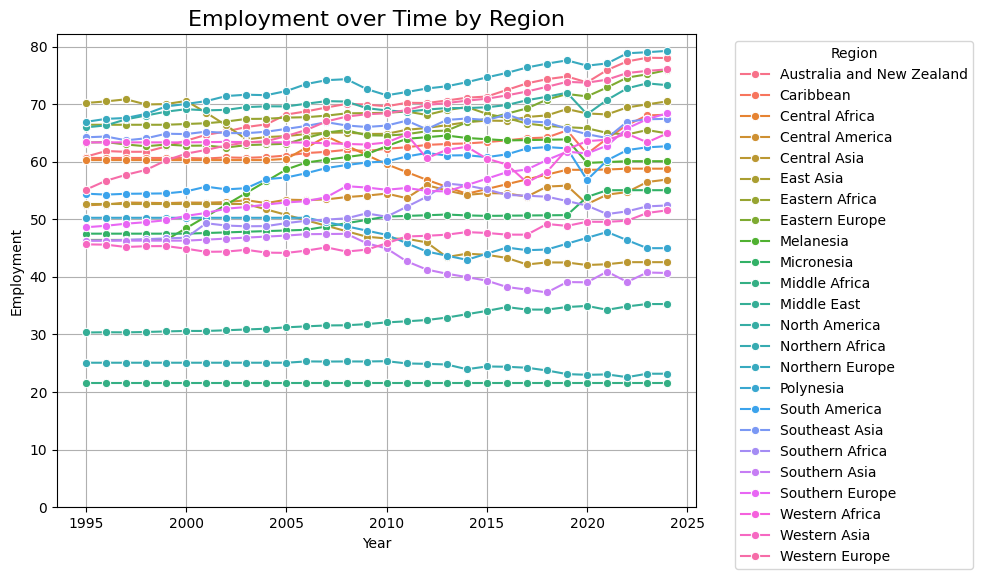

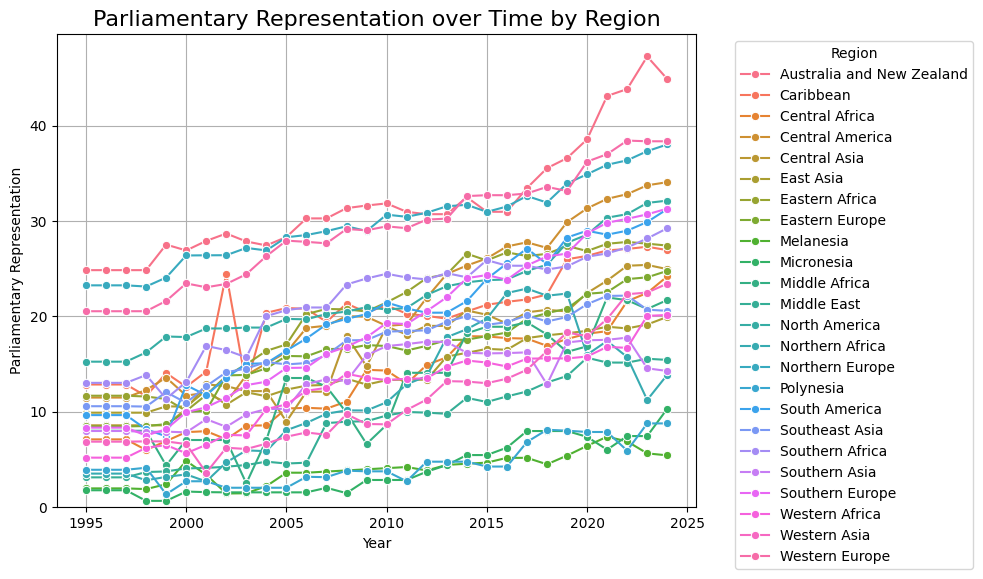

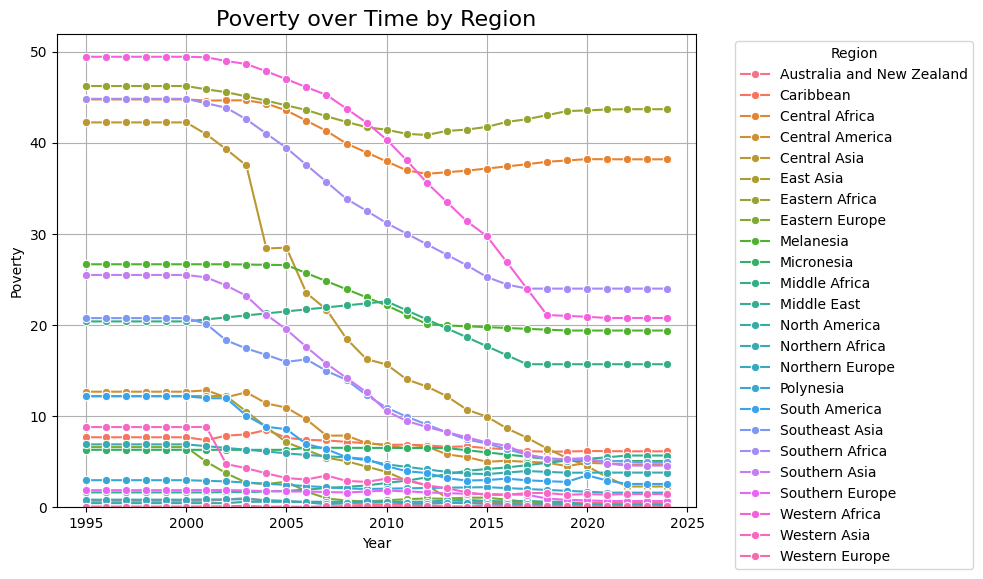

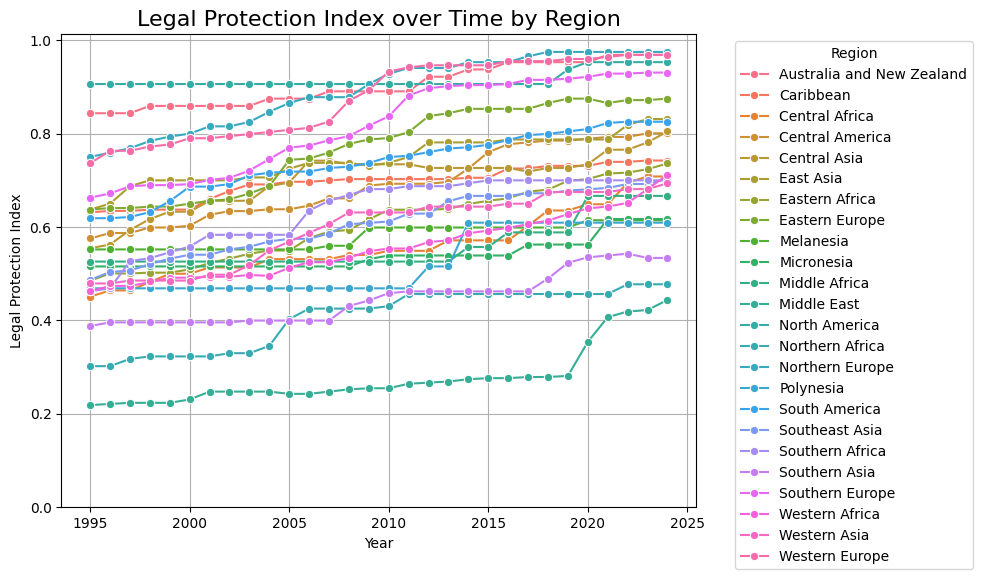

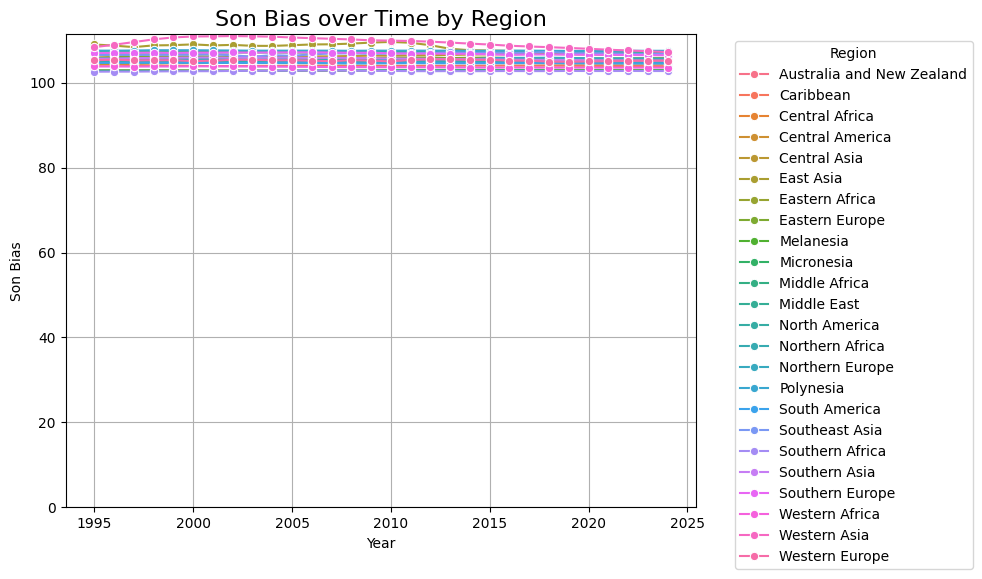

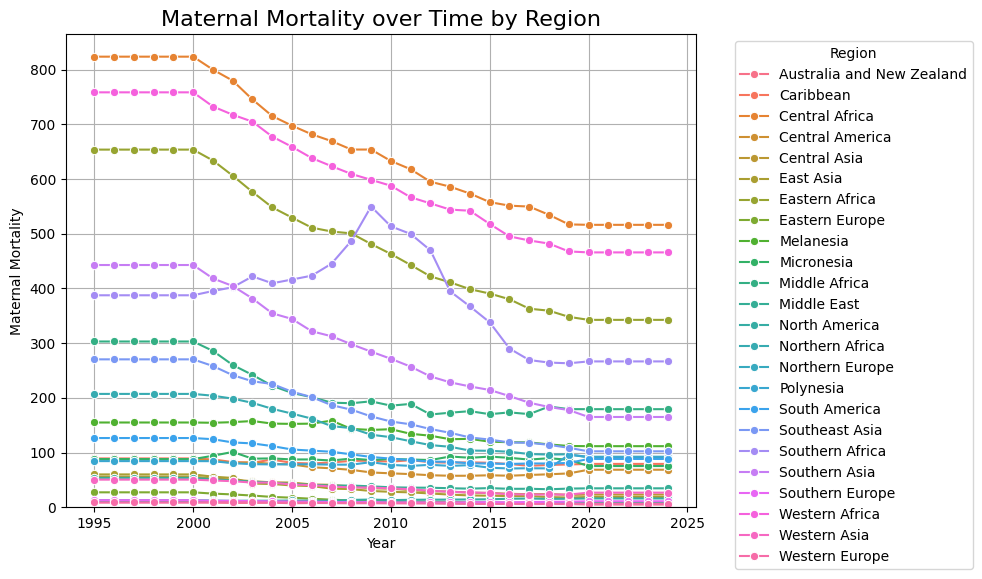

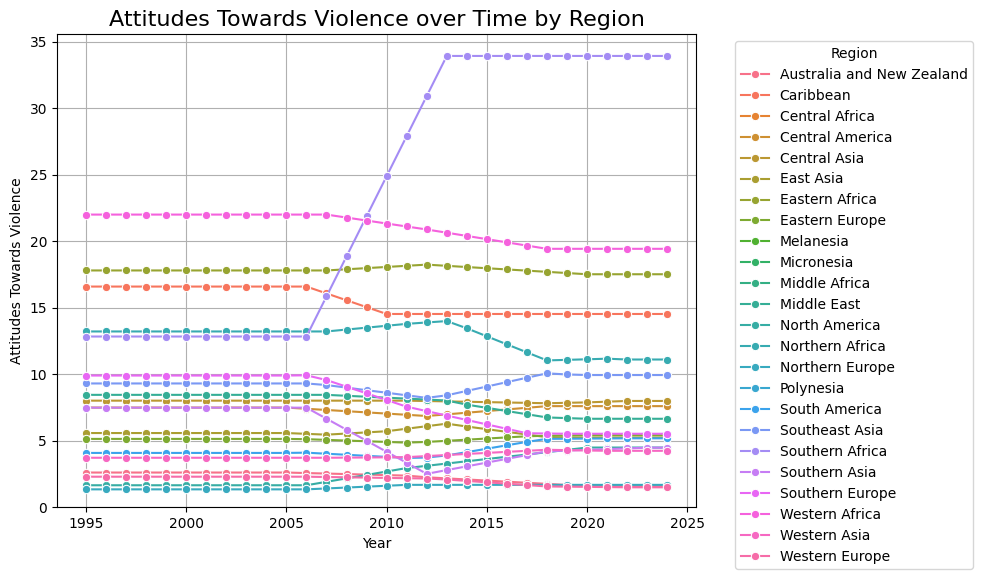

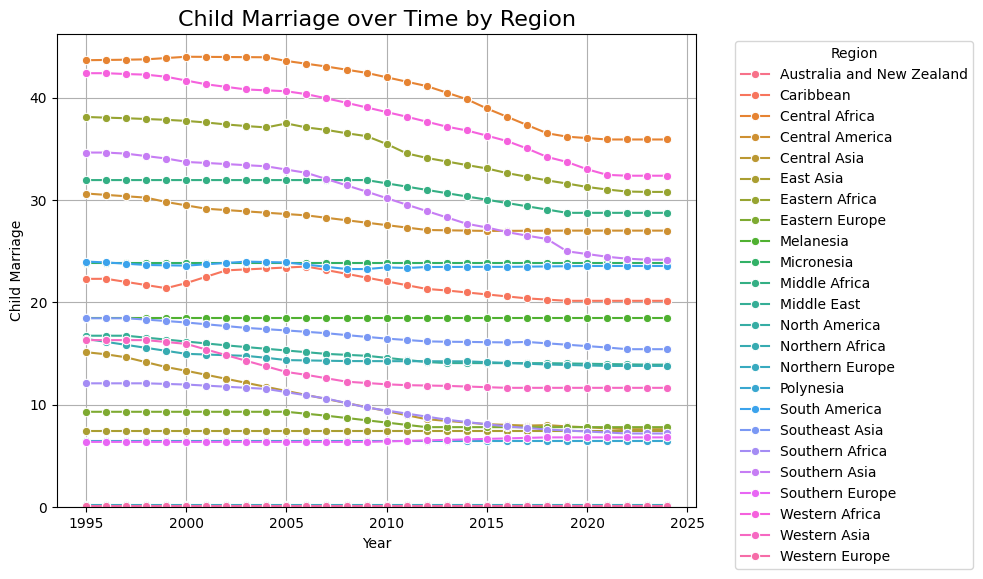

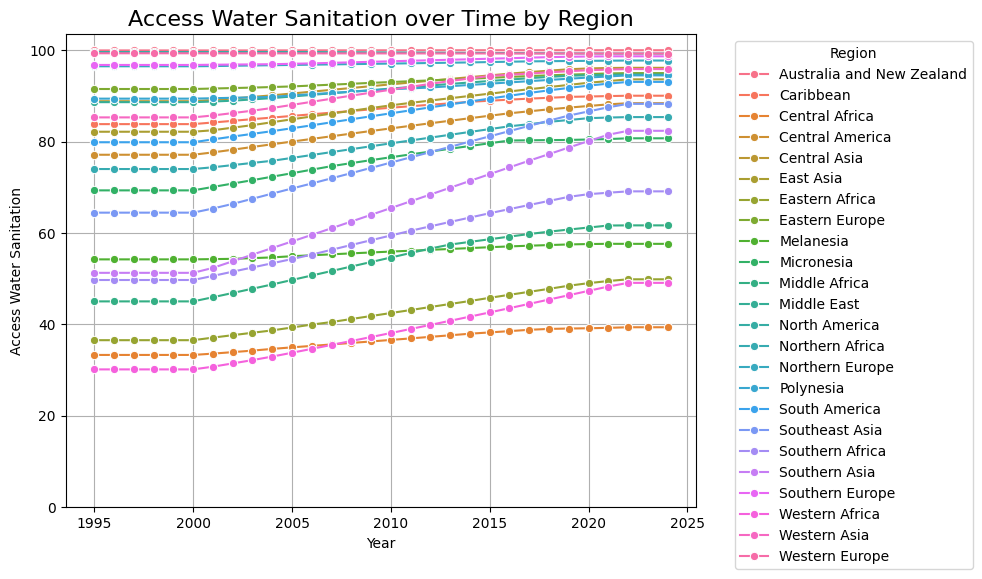

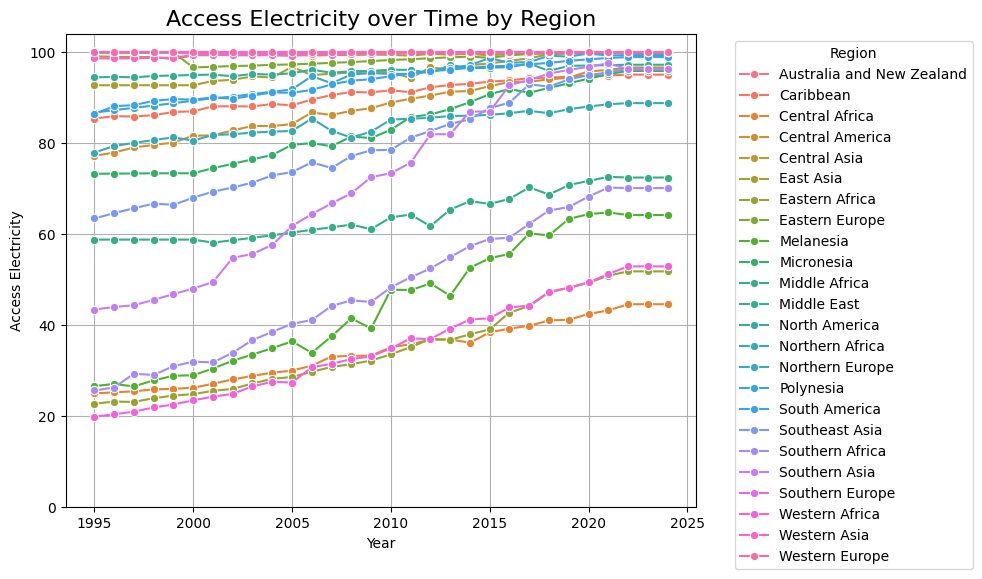

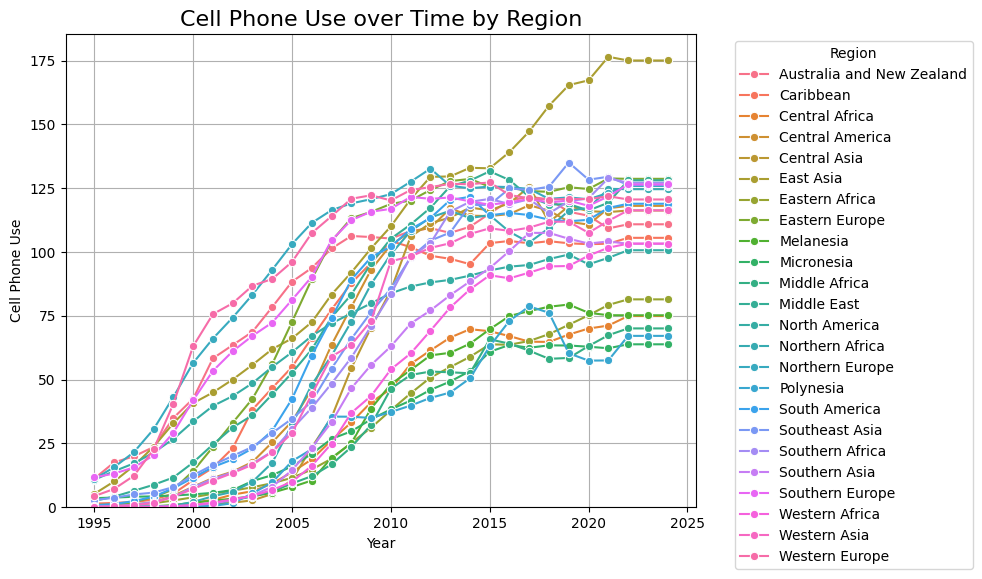

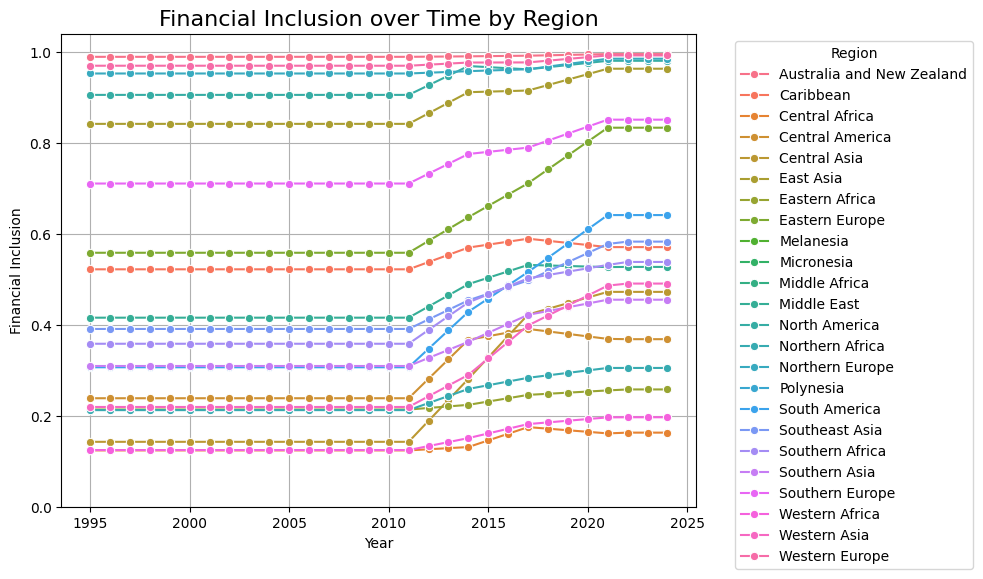

In [15]:
plot_region_averages(region_avgs)